## Recommendation System:

### Group Details:
|Roll Number|Name|
| ----------- | ----------- |
|E20004|Akshay Amrit|
|E20032|Shivam Babbar|

### Explore the movielens Dataset:

In [22]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.cluster import KMeans
import math

In [23]:
movies = pd.read_csv(os.getcwd()+'/MovieLens/movies.csv')
ratings = pd.read_csv(os.getcwd()+'/MovieLens/ratings.csv')

In [24]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [25]:
movies.shape

(58098, 3)

In [26]:
len(movies.movieId.unique())

58098

In [27]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [28]:
ratings.shape

(27753444, 4)

movies.csv: This dataset contains 58098 unique movies with their genres.

ratings.csv: This dataset contains 27753444 ratings provided to the movies present in the movies.csv dataset.

In [29]:
genres = list(set(movies.genres))

In [30]:
genre_set = set()
for i in genres: 
    genre_list = i.split(sep = '|')
    for j in genre_list:
        genre_set.add(j)

In [31]:
final_genre_list = list(genre_set)
print(final_genre_list)
print(len(final_genre_list))

['Crime', 'Fantasy', 'Animation', 'War', '(no genres listed)', 'Film-Noir', 'Documentary', 'Mystery', 'Drama', 'Western', 'Adventure', 'IMAX', 'Action', 'Sci-Fi', 'Romance', 'Musical', 'Thriller', 'Children', 'Horror', 'Comedy']
20


In [32]:
genre_count = dict()
for i in final_genre_list:
    for j in movies.genres:
        if i in j:
            genre_count[i] = genre_count.get(i, 0) + 1

print(genre_count)

{'Crime': 5105, 'Fantasy': 2637, 'Animation': 2663, 'War': 1820, '(no genres listed)': 4266, 'Film-Noir': 364, 'Documentary': 5118, 'Mystery': 2773, 'Drama': 24144, 'Western': 1378, 'Adventure': 4067, 'IMAX': 197, 'Action': 7130, 'Sci-Fi': 3444, 'Romance': 7412, 'Musical': 1113, 'Thriller': 8216, 'Children': 2749, 'Horror': 5555, 'Comedy': 15956}


In [33]:
genre_count_pd = pd.DataFrame({'Genre': list(genre_count.keys()), 'Count': list(genre_count.values())})

In [34]:
genre_count['(no genres listed)']/movies.shape[0]

0.07342765671795931

There are a total of 20 genres in the dataset. One of the genres which can be observed in the list of 
genres is (no genres listed). This actually is a placeholder for the genre of the movies which do not have any genre listed.
It is 7.34 % of the entire dataset. We'll take it as a genre and move on with our analysis

Populating the interactive namespace from numpy and matplotlib


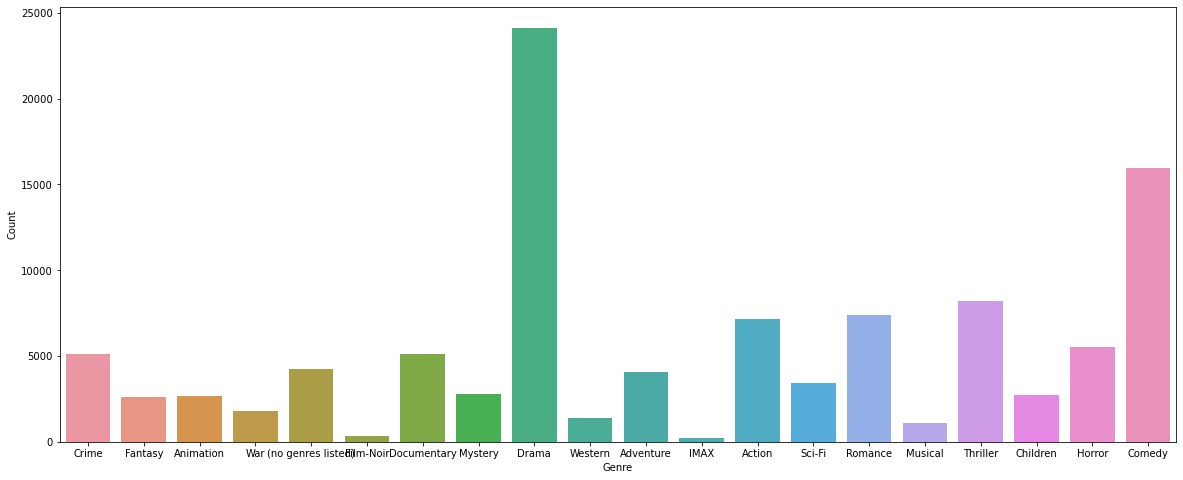

In [35]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 8)
sns.barplot(x = genre_count_pd.Genre, y = genre_count_pd.Count, data=genre_count_pd)
plt.show()

In [36]:
no_of_ratings = dict(ratings.movieId.value_counts())

In [37]:
len(no_of_ratings)

53889

In [38]:
rating_detail_pd = pd.DataFrame({'movieId': list(no_of_ratings.keys()), 'vote_count': list(no_of_ratings.values())})

In [39]:
grouped = ratings[['movieId', 'rating']].groupby(by='movieId')
mean_rating_pd = round(grouped.mean(), 2)

In [40]:
rating_detail_pd = pd.merge(rating_detail_pd, mean_rating_pd, how='left', on='movieId')

In [41]:
round(np.mean(np.array(ratings[ratings.movieId == 1].rating)), 2)

3.89

In [42]:
rating_detail_pd[rating_detail_pd.movieId == 1]

,movieId,vote_count,rating
9,1,68469,3.89


In [43]:
rating_detail_pd.columns = ['movieId', 'vote_count', 'mean_rating']

In [44]:
min_votes = rating_detail_pd.vote_count.quantile(0.9)
min_votes

531.0

In [45]:
mean_vote_report = rating_detail_pd.mean_rating.mean()
mean_vote_report

3.0686011987603927

In [46]:
# Calculating rating of movies according to the weighted rating formula used by IMDB
def calculate_rating(x, m=min_votes, C=mean_vote_report):
    v = x['vote_count']
    R = x['mean_rating']
    # Calculation based on the IMDB formula
    return round((v/(v+m) * R) + (m/(m+v) * C), 2)

In [47]:
rating_detail_pd_copy = rating_detail_pd.copy()

In [48]:
rating_detail_pd_copy = rating_detail_pd_copy[rating_detail_pd_copy.vote_count > min_votes]

In [49]:
rating_detail_pd_copy['score'] = rating_detail_pd_copy.apply(calculate_rating, axis=1)

In [50]:
movie_rating = pd.merge(movies, rating_detail_pd_copy[['movieId', 'vote_count', 'score']], how = 'left', on = 'movieId')

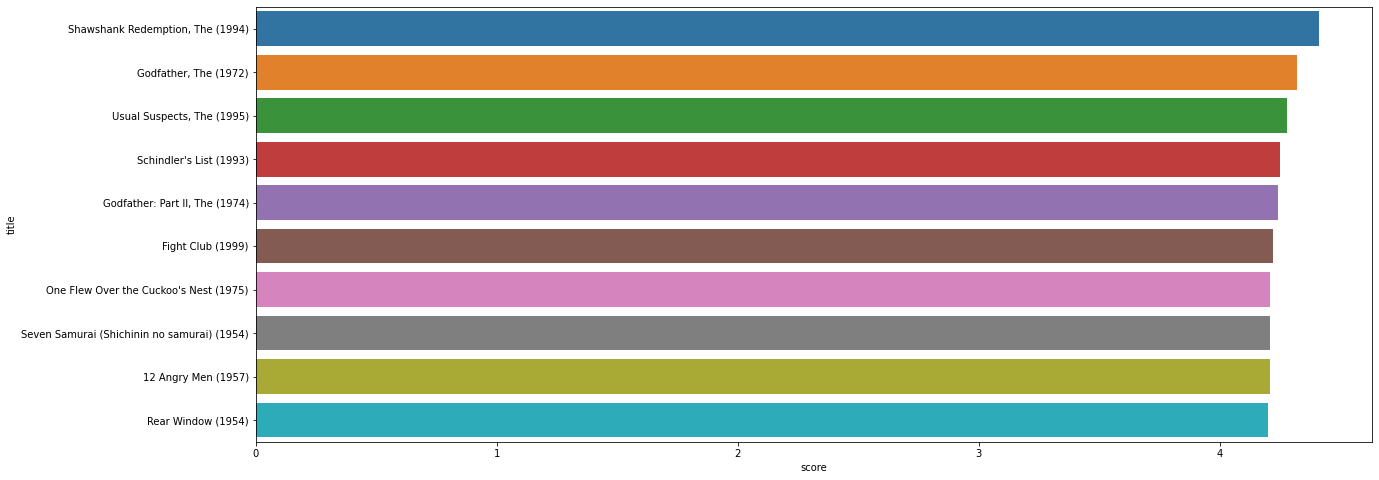

In [51]:
# Top ten movies in our database: 
sns.barplot(y = 'title', x = 'score', data=movie_rating.sort_values(by = 'score', ascending=False).head(10), )
plt.show()

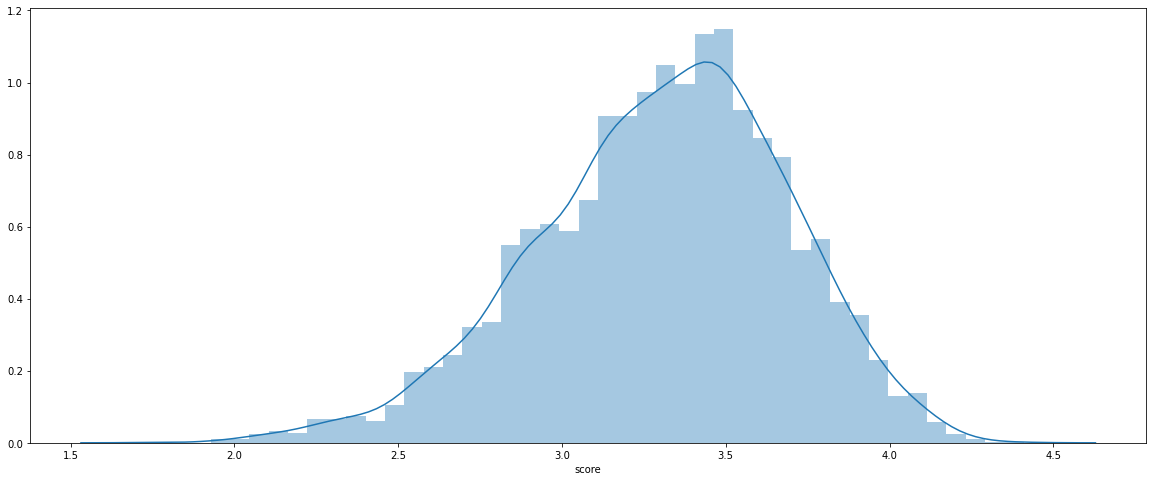

In [52]:
# Score Distribution
sns.distplot(movie_rating[movie_rating.score.notna()]['score'])
plt.show()

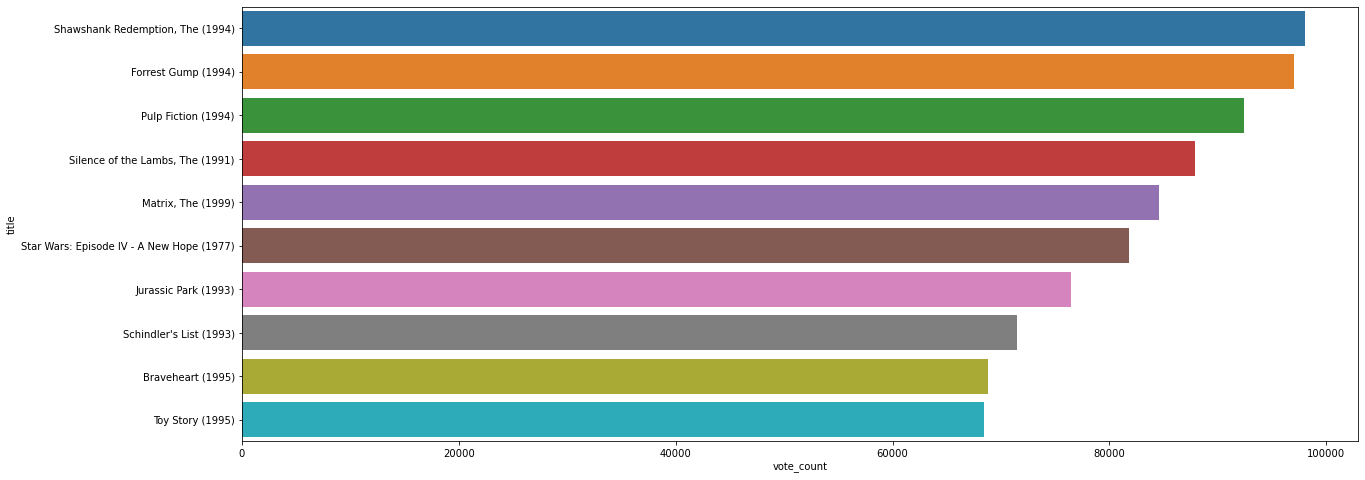

In [53]:
# top ten movie in popularity:
sns.barplot(y = 'title', x = 'vote_count', data=movie_rating.sort_values(by = 'vote_count', ascending=False).head(10), )
plt.show()

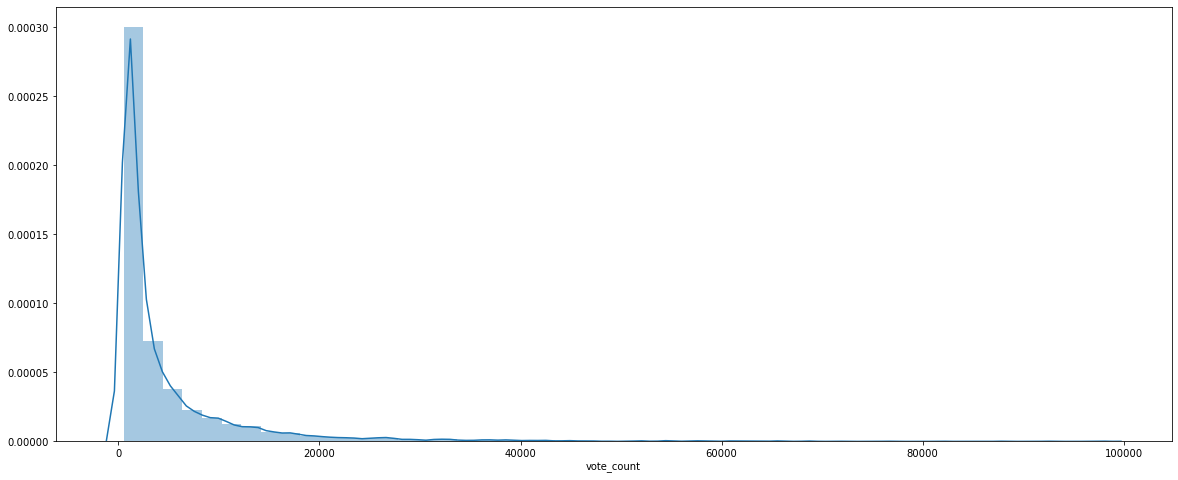

In [54]:
# Vote Count Distribution
sns.distplot(movie_rating[movie_rating.vote_count.notna()]['vote_count'])
plt.show()

In [55]:
title_list = list()
release_list = list()
for i in list(movie_rating.title):
    i = i.strip()
    title = i[:len(i) - 7]
    release = i[len(i) - 6:len(i)]
    if re.search('^\([0-9]{4}\)$',release) != None:
        title_list.append(title)
        release_list.append(int(release[1:5]))
    else: 
        title_list.append(i)
        release_list.append(float('NaN'))    

In [56]:
movie_rating.title = title_list
movie_rating['release'] = release_list

In [57]:
movie_rating[movie_rating.release.isna()]

,movieId,title,genres,vote_count,score,release
10023,32930,Category 6: Day of Destruction,Action|Drama,NaN,NaN,NaN
10613,40697,Babylon 5,Sci-Fi,NaN,NaN,NaN
15719,79607,"Millions Game, The (Das Millionenspiel)",Action|Drama|Sci-Fi|Thriller,NaN,NaN,NaN
17444,87442,"Bicycle, Spoon, Apple (Bicicleta, cullera, poma)",Documentary,NaN,NaN,NaN
20012,98063,Mona and the Time of Burning Love (Mona ja pal...,Drama,NaN,NaN,NaN
...,...,...,...,...,...,...
57504,192339,The Sign of Three,(no genres listed),NaN,NaN,NaN
57674,192829,Parwaaz Hai Junoon,Adventure|Children|Romance,NaN,NaN,NaN
57789,193149,¿Qué te juegas?,(no genres listed),NaN,NaN,NaN
57903,193443,Wall,(no genres listed),NaN,NaN,NaN


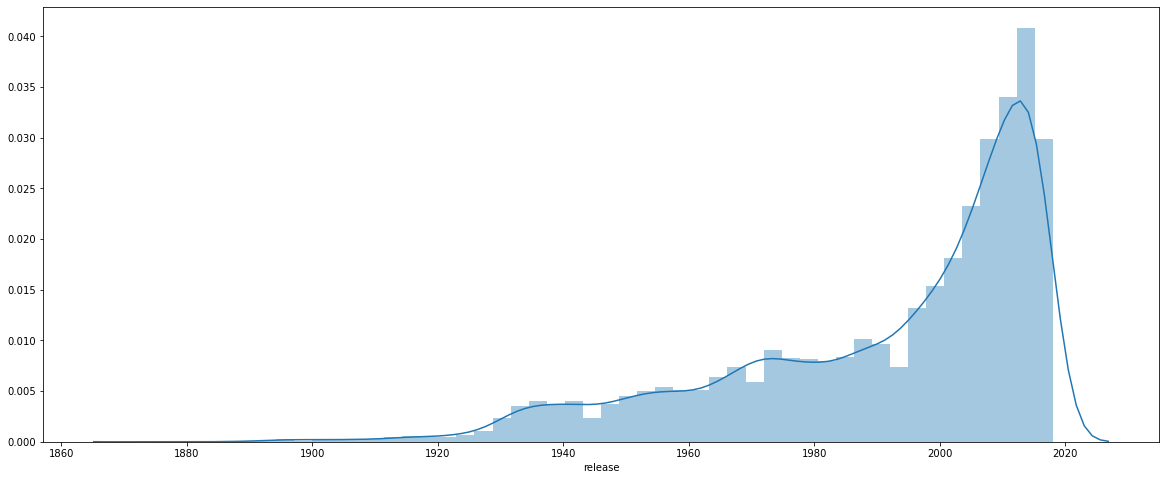

In [58]:
sns.distplot(movie_rating[movie_rating.release.notna()].release)
plt.show()

### Create Clusters using genres:

In [59]:
movies_cluster = movie_rating[['movieId', 'title', 'genres']].copy()

In [60]:
movies_cluster.head()

,movieId,title,genres
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji,Adventure|Children|Fantasy
2,3,Grumpier Old Men,Comedy|Romance
3,4,Waiting to Exhale,Comedy|Drama|Romance
4,5,Father of the Bride Part II,Comedy


In [61]:
for i in genre_count_pd.Genre:
    binary_list = list()
    for j in movies_cluster.genres:
        if i in j:
            binary_list.append(1)
        else:
            binary_list.append(0)
    movies_cluster[i] = binary_list    

In [41]:
movies_cluster.drop('genres', axis=1, inplace=True)

In [42]:
movies_cluster = movies_cluster[movies_cluster['(no genres listed)'] == 0]

In [43]:
movies_cluster.drop('(no genres listed)', axis=1, inplace=True)

In [44]:
sample_dataset = movies_cluster.copy()

In [45]:
sample_dataset.shape

(53832, 21)

In [46]:
for i in sample_dataset.columns[2:]:
    total = sample_dataset[i].sum()
    print('column: {} \t sum: {}'.format(i, total))

column: Western 	 sum: 1378
column: Mystery 	 sum: 2773
column: Romance 	 sum: 7412
column: Horror 	 sum: 5555
column: Action 	 sum: 7130
column: Film-Noir 	 sum: 364
column: Adventure 	 sum: 4067
column: Musical 	 sum: 1113
column: IMAX 	 sum: 197
column: Crime 	 sum: 5105
column: Animation 	 sum: 2663
column: Documentary 	 sum: 5118
column: Comedy 	 sum: 15956
column: War 	 sum: 1820
column: Thriller 	 sum: 8216
column: Children 	 sum: 2749
column: Drama 	 sum: 24144
column: Fantasy 	 sum: 2637
column: Sci-Fi 	 sum: 3444


In [47]:
clusters = [KMeans(n_clusters=i, random_state=0) for i in range(1,21)]

In [48]:
score = [clusters[i].fit(sample_dataset.iloc[:, 2:]).score(sample_dataset.iloc[:, 2:]) for i in range(len(clusters))]

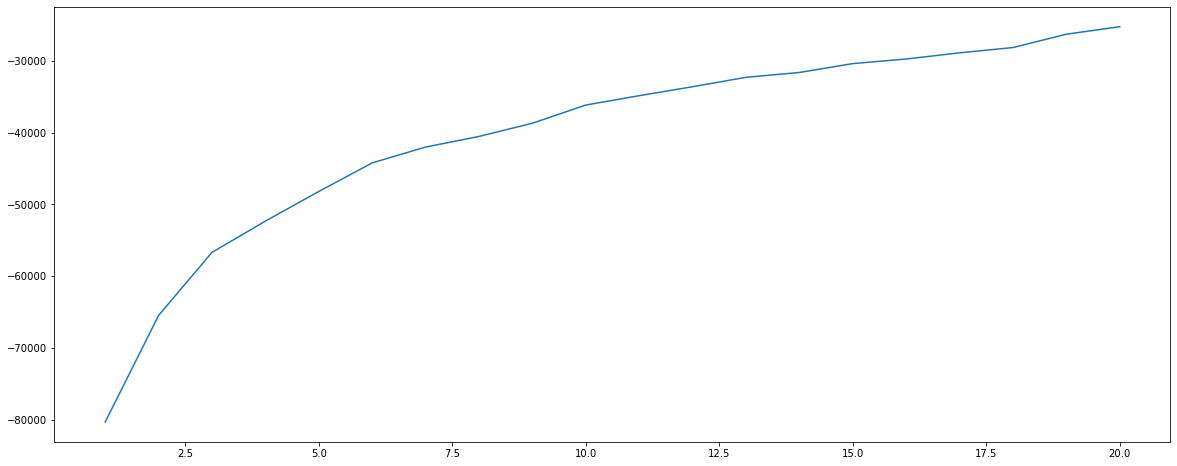

In [49]:
plt.plot(range(1,21), score)
plt.show()

In [50]:
final_cluster = KMeans(n_clusters=10, random_state=0).fit(sample_dataset.iloc[:, 2:])

In [51]:
final_cluster.predict(movies_cluster.iloc[:5, 2:])

array([8, 8, 3, 3, 4])

In [52]:
sample_dataset['cluster'] = list(final_cluster.labels_)

In [53]:
sample_dataset.head()

,movieId,title,Western,Mystery,Romance,Horror,Action,Film-Noir,Adventure,Musical,...,Animation,Documentary,Comedy,War,Thriller,Children,Drama,Fantasy,Sci-Fi,cluster
0,1,Toy Story,0,0,0,0,0,0,1,0,...,1,0,1,0,0,1,0,1,0,8
1,2,Jumanji,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,8
2,3,Grumpier Old Men,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,3
3,4,Waiting to Exhale,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,3
4,5,Father of the Bride Part II,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,4


### Cluster Profiling

In [54]:
cluster_list = list()
for i in range(10):
    cluster_list.append(pd.DataFrame(sample_dataset[sample_dataset.cluster == i].iloc[:, 2:sample_dataset.shape[1]-1].mean(), columns=['genre_percentage']))

In [55]:
def plot_genre_dist(i):
    sns.barplot(y = cluster_list[i].index, x = cluster_list[i].genre_percentage * 100, data=cluster_list[i])
    plt.title('Genre Distribution of Cluster {}'.format(i))
    plt.xlabel('Percent of Movies')
    plt.ylabel('Genre')
    plt.xlim(0,100)
    plt.show()

#### Cluster 0 mainly consists of Documentaries as around 80 percent of the movies present in this cluster belong to this genre.

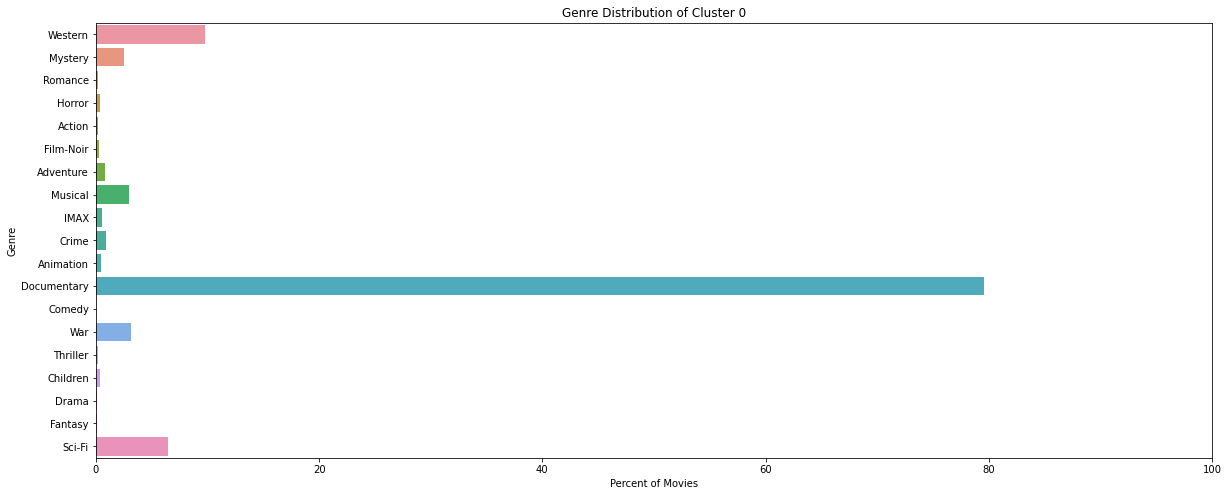

In [56]:
plot_genre_dist(0)

#### Cluster 1 mainly consists of Action genre as all of the movies present in this cluster belong to this genre. This cluster will be used to predict the movies which contain Action as genre. Some frequent combinations with Action genre in this cluster are Drama, Adventure and Thriller.

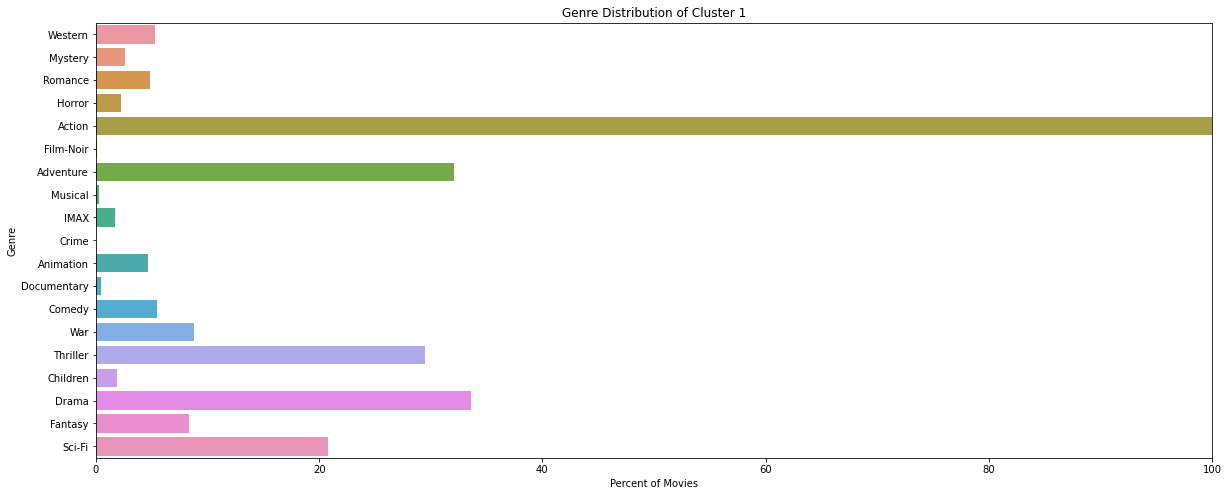

In [57]:
plot_genre_dist(1)

#### Cluster 2 mainly consists of Horror genre as all of the movies present in this cluster belong to this genre. This cluster will be used to predict the movies which contain Horror as genre. Thriller genre is commonly observed with Horror in this cluster as well.

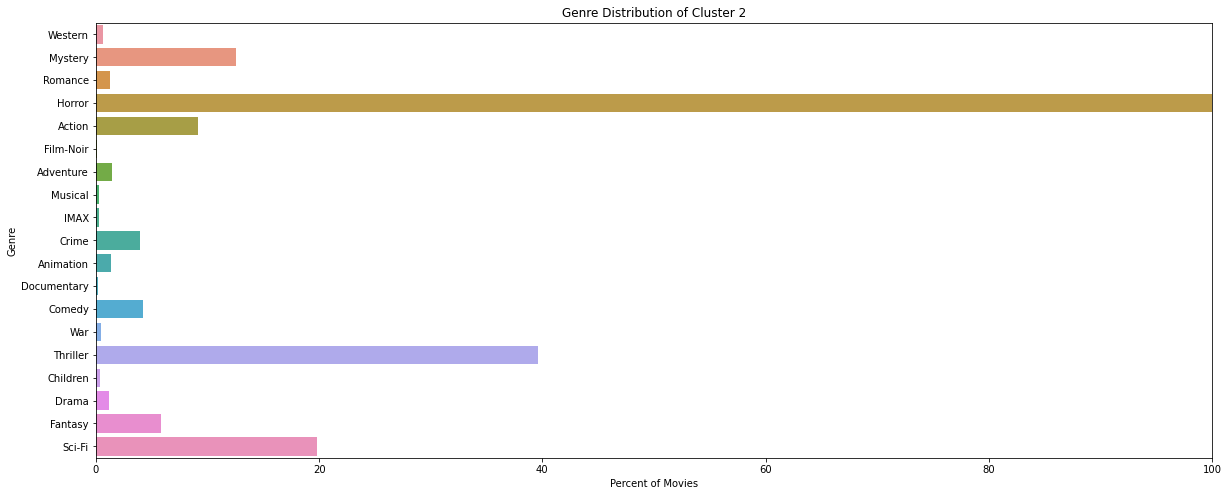

In [58]:
plot_genre_dist(2)

#### Cluster 3 mainly consists of Romance genre as all of the movies present in this cluster belong to this genre. This cluster will be used to predict the movies which contain Romance as genre. Some frequent combinations with Romance genre in this cluster are Drama and Comedy.

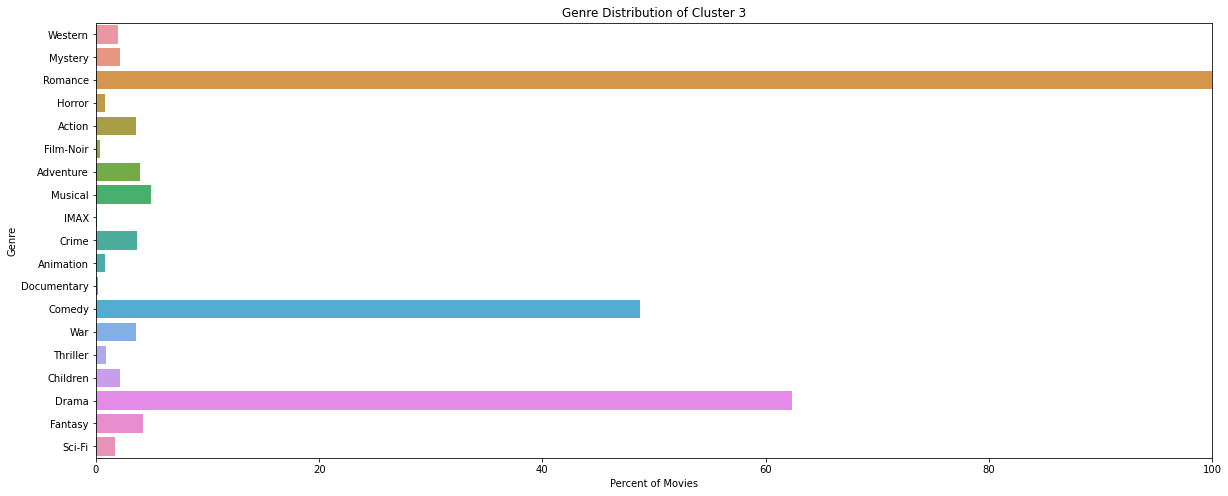

In [59]:
plot_genre_dist(3)

#### Cluster 4 mainly consists of Comedy as all of the movies present in this cluster belong to this genre.

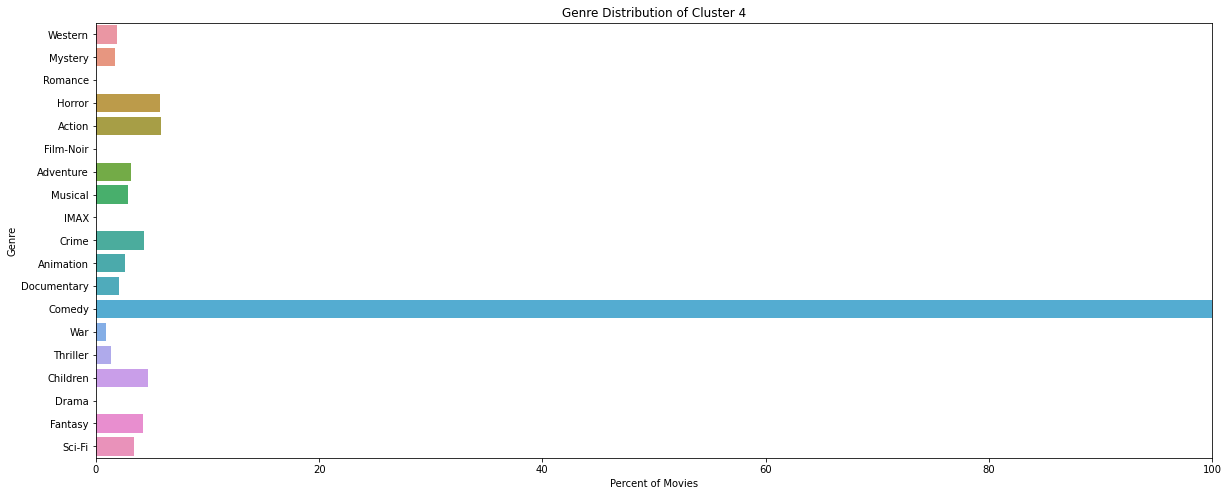

In [60]:
plot_genre_dist(4)

#### Cluster 5 mainly consists of Thriller genre as all of the movies present in this cluster belong to this genre. This cluster will be used to predict the movies which contain Thriller as genre. Drama genre is also frequently observed with this genre.

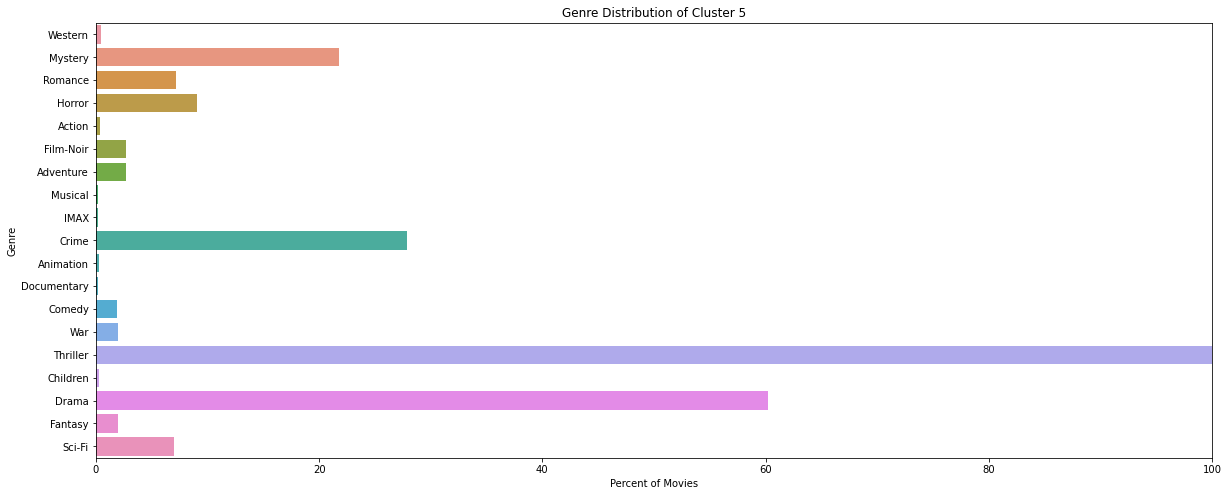

In [61]:
plot_genre_dist(5)

#### Cluster 6 mainly consists of Drama as all of the movies present in this cluster belong to this genre.

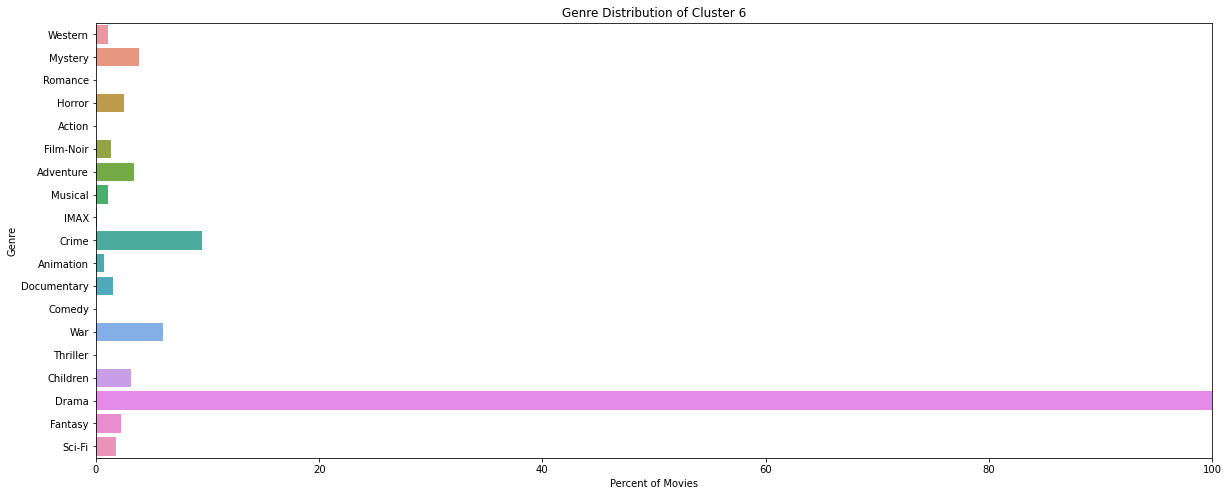

In [62]:
plot_genre_dist(6)

#### Cluster 7 mainly consists of Crime genre as all of the movies present in this cluster belong to this genre. This cluster will be used to predict the movies which contain Crime as genre. Some frequent combinations with Crime genre in this cluster are Action, Thriller and Drama.

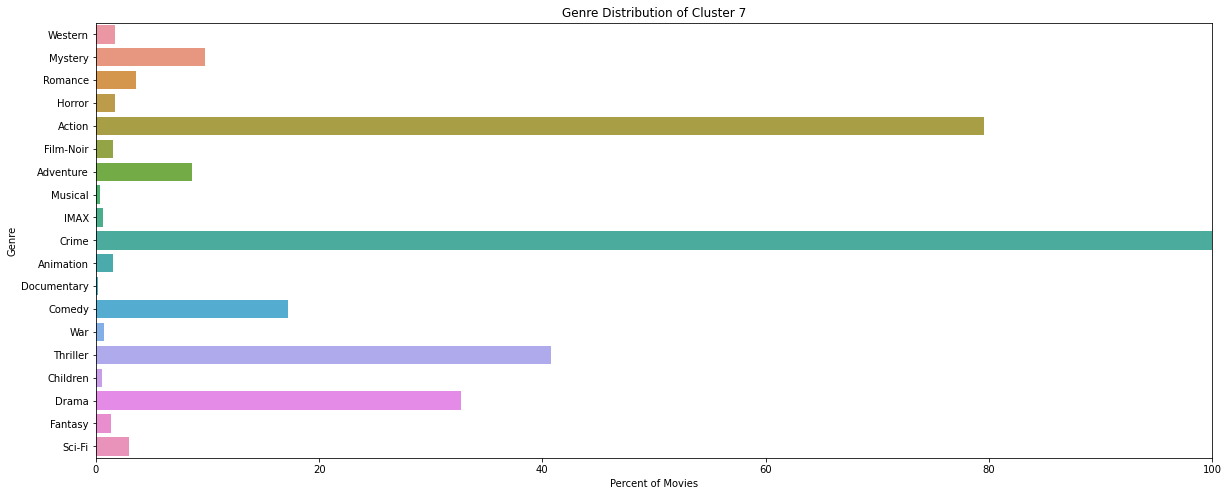

In [63]:
plot_genre_dist(7)

#### Even though animation is the most dominant genre in cluster 8, this cluster mainly caters to children and teenagers the percentage of occurance of genres is divided into Animation, Children, Adventure and Fantasy.

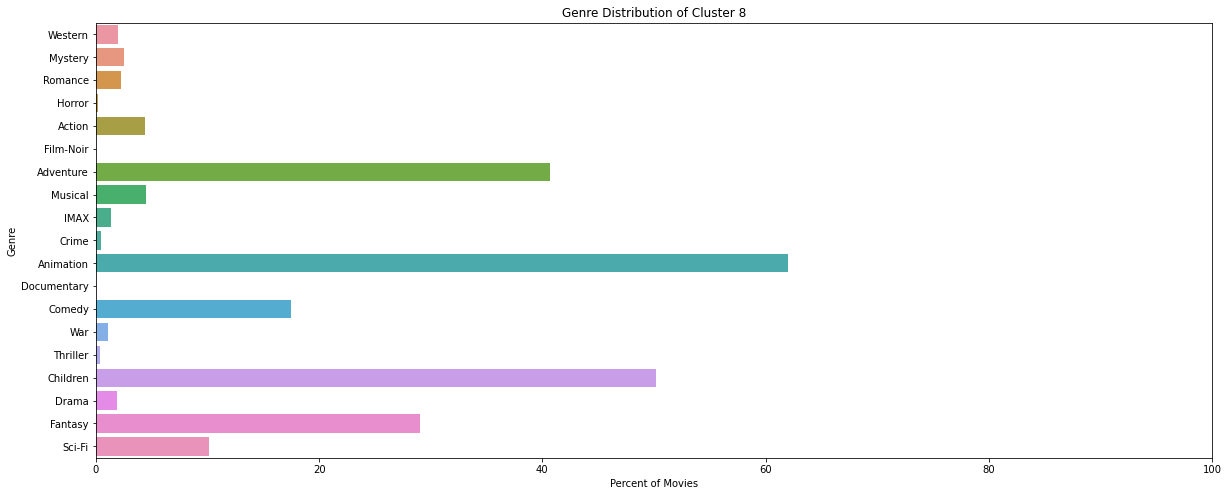

In [64]:
plot_genre_dist(8)

#### Cluster 9 consists of movies which belong to genre Comedy as well as Drama for sure as all the movies in this genre definitely contain both of them.

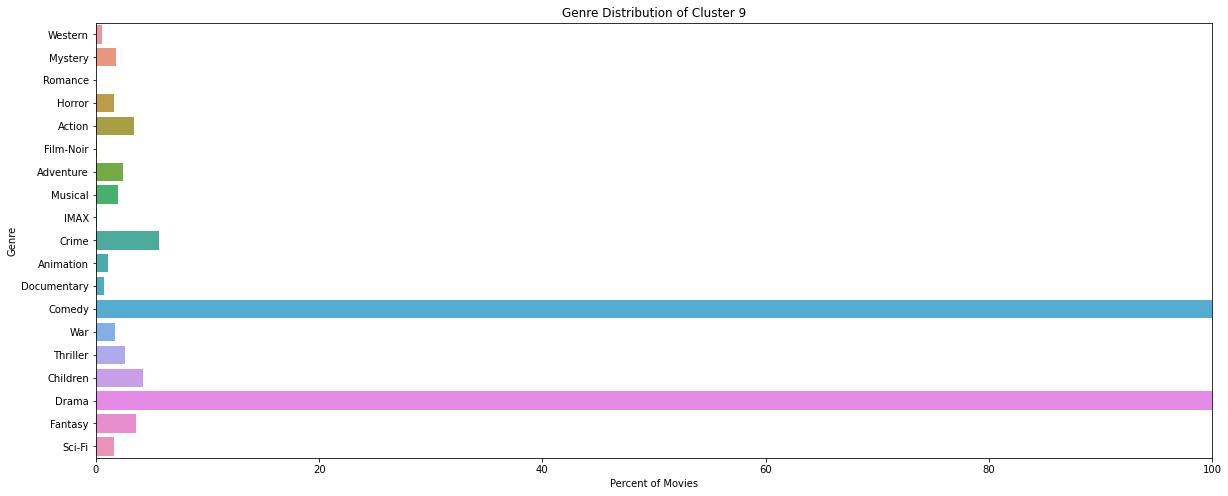

In [65]:
plot_genre_dist(9)

In [66]:
final_dataset = pd.merge(sample_dataset, movie_rating[['movieId', 'release', 'score']], how='left', on='movieId')

In [67]:
final_dataset.release = final_dataset.release.apply(lambda x: 0 if math.isnan(x) else int(x))

In [68]:
def provide_suggestions(title, no_of_suggestions = 5):
    if title not in list(final_dataset.title):
        raise Exception(('\'{}\' not found in the list of titles in the dataset. Title name is case sensitive. Please check the spelling and try again'.format(title)))
    cluster_no = int(final_dataset[final_dataset.title == title].iloc[:, -3])
    final_suggestions = final_dataset.loc[(final_dataset.cluster == cluster_no) & (final_dataset.title != title), :].sort_values(by = 'score', ascending=False).head(no_of_suggestions).iloc[:, [1, -2, -1]]
    return(final_suggestions)

In [69]:
provide_suggestions('Toy Story')

,title,release,score
5520,Spirited Away (Sen to Chihiro no kamikakushi),2001,4.18
1125,Wallace & Gromit: The Wrong Trousers,1993,4.10
4898,"Lord of the Rings: The Fellowship of the Ring,...",2001,4.09
5873,My Neighbor Totoro (Tonari no Totoro),1988,4.09
732,Wallace & Gromit: A Close Shave,1995,4.07
